### import libraries

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns

### problem statement 

### Data Gathering 

In [2]:
df= pd.read_csv("medical_insurance.csv")
df

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Exploratory Data analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.isna().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### encoding on obejct dtype

##### encoding on ordinal data

In [5]:
df['gender'].value_counts()

gender
male      676
female    662
Name: count, dtype: int64

In [6]:
# encoding >> lable encoding  
df['gender'].replace({'male':1,'female':0},inplace=True)


In [7]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [8]:
df['smoker'].replace({'no':1,'yes':0},inplace=True)

In [9]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [10]:
# encoding on nominal data >> one hot encoding
df= pd.get_dummies(df ,columns= ['region'],dtype= int)
df

,age,gender,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,0,16884.92400,0,0,0,1
1,18,1,33.770,1,1,1725.55230,0,0,1,0
2,28,1,33.000,3,1,4449.46200,0,0,1,0
3,33,1,22.705,0,1,21984.47061,0,1,0,0
4,32,1,28.880,0,1,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,10600.54830,0,1,0,0
1334,18,0,31.920,0,1,2205.98080,1,0,0,0
1335,18,0,36.850,0,1,1629.83350,0,0,1,0
1336,21,0,25.800,0,1,2007.94500,0,0,0,1


### train_test_split

In [11]:
x= df.drop('charges',axis= 1)
y = df['charges']

In [12]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)


### model evaluation

In [13]:
rf_reg = RandomForestRegressor(random_state=1)
rf_reg.fit(x_train,y_train)

RandomForestRegressor(random_state=1)

In [14]:
rf_reg.feature_importances_

array([0.13684203, 0.00591541, 0.21606137, 0.02022377, 0.60167828,
       0.0051672 , 0.00559176, 0.00481762, 0.00370257])

<Axes: >

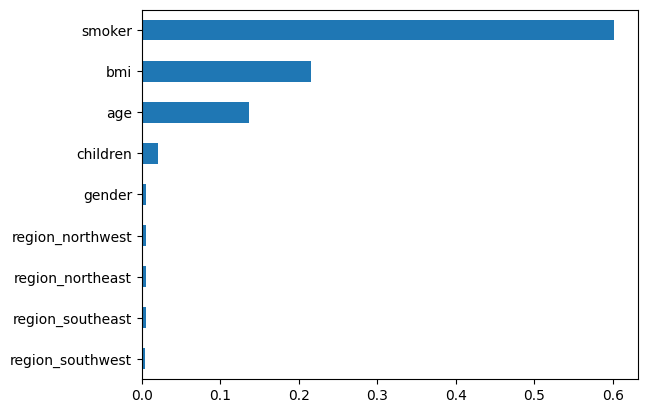

In [15]:
s1= pd.Series(rf_reg.feature_importances_ ,index =x.columns )
s1.sort_values().plot(kind= 'barh')

### Training Data evaluation

In [16]:
y_pred_train= rf_reg.predict(x_train)
mse= mean_absolute_error(y_train,y_pred_train)
print("MSE:",mse)
rmse= np.sqrt(mse)
print("RMSE:",rmse)
mae= mean_absolute_error(y_train,y_pred_train)
print("MAE:",mae)
r2_sc= r2_score(y_train,y_pred_train)
print("R2_score:",r2_sc)

MSE: 1043.3536354660466
RMSE: 32.300985054113234
MAE: 1043.3536354660466
R2_score: 0.9750085493425379


### Testing data evaluation

In [17]:
y_pred= rf_reg.predict(x_test)
mse= mean_absolute_error(y_test,y_pred)
print("MSE:",mse)
rmse= np.sqrt(mse)
print("RMSE:",rmse)
mae= mean_absolute_error(y_test,y_pred)
print("MAE:",mae)
r2_sc= r2_score(y_test,y_pred)
print("R2_score:",r2_sc)

MSE: 2629.471111731138
RMSE: 51.27836884819113
MAE: 2629.471111731138
R2_score: 0.8785150988719818
